# Importing Libraries

In [ ]:
!pip install langdetect

     |████████████████████████████████| 983kB 9.0MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=d536e48fce3a7e72d4927949420ed3f8a9e950a8a00d43c8203d3d7f6cd8601f
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re  
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import spacy # for lemmatization

import langdetect
from langdetect import detect # language detection

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Reading Data

In [ ]:
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1jJWR70pvSu8iXCK40QEa3z60HR3Bfr8C/view?usp=sharing' # The shareable link
  
# to get the id part of the file 
id = link.split("/")[-2]

myfile = drive.CreateFile({'id':id})
myfile.GetContentFile('webtext_gpt2.csv')

In [ ]:
df = pd.read_csv('webtext_gpt2.csv', sep='\t')
df

,id,ended,length,text,type,label
0,47018,True,102,The overarching quality of the Bloomberg era w...,train,real
1,94338,True,142,This is about as bad as my morning commute get...,train,real
2,44507,True,631,More on Saskatchewan Liquor Privatization\n\nM...,train,real
3,163493,False,1024,Killen was here\n\nPatrick Killen helped defin...,train,real
4,91925,True,51,Mailbox Rental & Mail Forwarding\n\nServices i...,train,real
...,...,...,...,...,...,...
99995,88658,True,548,The official website for Donten ni Warau TV 's...,train,GPT-2
99996,7575,True,803,"I have a long, slow, and somewhat unproductive...",train,GPT-2
99997,38428,False,1024,"""Flexibility Is Not an Option""\n\nAt The Nouri...",train,GPT-2
99998,129005,True,137,\nDuck Dynasty's Phil Robertson will have to m...,train,GPT-2


In [ ]:
type(df)
type(df['text'][29])

str

In [ ]:
# Sample row
print(df['text'][29])

Check the VGChartz Methodology page for more information on regional definitions and how data is arrived at.

HTML Code:

Forum Code:

[b]Global Weekly Chart[/b] [b]Week Ending 21st Dec 2013[/b] Pos - Game - Week - Weekly - Total 1. [url=http://gamewise.co/games/46095/Pokemon-X-Pokemon-Y]Pokemon X/Y - 3DS[/url] - [i]11[/i] - [url=http://www.vgchartz.com/game/71449/pokemon-xpokemon-y/]632,878[/url] - [b]9,379,545[/b] 2. [url=http://gamewise.co/games/46158/Call-of-Duty-Ghosts]Call of Duty: Ghosts - X360[/url] - [i]7[/i] - [url=http://www.vgchartz.com/game/71508/call-of-duty-ghosts/]561,066[/url] - [b]7,161,626[/b] 3. [url=http://gamewise.co/games/47596/Just-Dance-2014]Just Dance 2014 - Wii[/url] - [i]12[/i] - [url=http://www.vgchartz.com/game/73119/just-dance-2014/]560,796[/url] - [b]2,326,755[/b] 4. [url=http://gamewise.co/games/46158/Call-of-Duty-Ghosts]Call of Duty: Ghosts - PS3[/url] - [i]7[/i] - [url=http://www.vgchartz.com/game/71507/call-of-duty-ghosts/]538,224[/url] - [b]6,791,01

# Data exploration


## Histogram

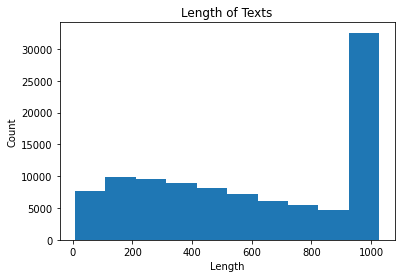

In [ ]:
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig=plt.figure()
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(df['length'],bins = 10)

#Labels and Tit
plt.title('Length of Texts')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

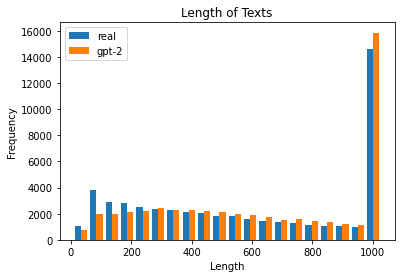

In [ ]:
#Variable
real = df['label']=="real"
label_real = df[real]
gpt2 = df['label']=="GPT-2"
label_gpt2 = df[gpt2]

plt.hist([label_real['length'],label_gpt2['length']], bins=20, label=['real','gpt-2'])

#Labels and Tit
plt.legend(loc='best')
plt.title('Length of Texts')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
## Histogram Real vs GPT-2

## Boxplot

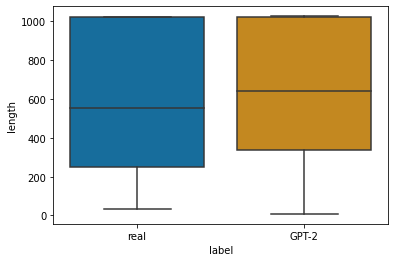

In [ ]:
sns.boxplot(y='length', x='label', 
                 data=df, 
                 palette="colorblind")

# Data preprocessing

## Summary of preprocessing

- removing non-alphabets
- remove url (starting with "http", "www", "goo."
- remove all kind of linebreak or format from string (example: [b], [\b],...)
- remove words having lenght of 1 or less (len < 3)
https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/)
- consider to lemmatization (https://www.kdnuggets.com/2018/08/practitioners-guide-processing-understanding-text-2.html)
- remove stopwords

consider:

"I'm working" vs "I am working" vs " I am a "working" mom"

=> do lemmatization
example: 
orginial text: "I'm working"
after lemmatization: "I be work" and then do remove stopwords

Ref: https://www.kdnuggets.com/2018/08/practitioners-guide-processing-understanding-text-2.html

## Remove all kind of linebreak or format from text

Example of linebreak or format from string: [b], [\b], [i], [\i],...

In [ ]:
# Example of a text including linebreak or format from text
df['text'][29]

"Check the VGChartz Methodology page for more information on regional definitions and how data is arrived at.\n\nHTML Code:\n\nForum Code:\n\n[b]Global Weekly Chart[/b] [b]Week Ending 21st Dec 2013[/b] Pos - Game - Week - Weekly - Total 1. [url=http://gamewise.co/games/46095/Pokemon-X-Pokemon-Y]Pokemon X/Y - 3DS[/url] - [i]11[/i] - [url=http://www.vgchartz.com/game/71449/pokemon-xpokemon-y/]632,878[/url] - [b]9,379,545[/b] 2. [url=http://gamewise.co/games/46158/Call-of-Duty-Ghosts]Call of Duty: Ghosts - X360[/url] - [i]7[/i] - [url=http://www.vgchartz.com/game/71508/call-of-duty-ghosts/]561,066[/url] - [b]7,161,626[/b] 3. [url=http://gamewise.co/games/47596/Just-Dance-2014]Just Dance 2014 - Wii[/url] - [i]12[/i] - [url=http://www.vgchartz.com/game/73119/just-dance-2014/]560,796[/url] - [b]2,326,755[/b] 4. [url=http://gamewise.co/games/46158/Call-of-Duty-Ghosts]Call of Duty: Ghosts - PS3[/url] - [i]7[/i] - [url=http://www.vgchartz.com/game/71507/call-of-duty-ghosts/]538,224[/url] - [b]6

In [ ]:
df_clean = df.copy()
df_clean

,id,ended,length,text,type,label
0,47018,True,102,The overarching quality of the Bloomberg era w...,train,real
1,94338,True,142,This is about as bad as my morning commute get...,train,real
2,44507,True,631,More on Saskatchewan Liquor Privatization\n\nM...,train,real
3,163493,False,1024,Killen was here\n\nPatrick Killen helped defin...,train,real
4,91925,True,51,Mailbox Rental & Mail Forwarding\n\nServices i...,train,real
...,...,...,...,...,...,...
99995,88658,True,548,The official website for Donten ni Warau TV 's...,train,GPT-2
99996,7575,True,803,"I have a long, slow, and somewhat unproductive...",train,GPT-2
99997,38428,False,1024,"""Flexibility Is Not an Option""\n\nAt The Nouri...",train,GPT-2
99998,129005,True,137,\nDuck Dynasty's Phil Robertson will have to m...,train,GPT-2


In [ ]:
# Replace "\n" with " "
df_clean['tidy_text'] = df_clean['text'].str.replace(r'\n', ' ')

# Adding space before and after square brackets []
df_clean['tidy_text'] = df_clean['tidy_text'].str.replace(r'\[', ' [')
df_clean['tidy_text'] = df_clean['tidy_text'].str.replace(r'\]', '] ')

# Replace anything start with [ and end with ] with " "
df_clean['tidy_text'] = df_clean['tidy_text'].str.replace(r'\[(.*?)\]', ' ')

In [ ]:
df_clean

,id,ended,length,text,type,label,tidy_text
0,47018,True,102,The overarching quality of the Bloomberg era w...,train,real,The overarching quality of the Bloomberg era w...
1,94338,True,142,This is about as bad as my morning commute get...,train,real,This is about as bad as my morning commute get...
2,44507,True,631,More on Saskatchewan Liquor Privatization\n\nM...,train,real,More on Saskatchewan Liquor Privatization My ...
3,163493,False,1024,Killen was here\n\nPatrick Killen helped defin...,train,real,Killen was here Patrick Killen helped define ...
4,91925,True,51,Mailbox Rental & Mail Forwarding\n\nServices i...,train,real,Mailbox Rental & Mail Forwarding Services in ...
...,...,...,...,...,...,...,...
99995,88658,True,548,The official website for Donten ni Warau TV 's...,train,GPT-2,The official website for Donten ni Warau TV 's...
99996,7575,True,803,"I have a long, slow, and somewhat unproductive...",train,GPT-2,"I have a long, slow, and somewhat unproductive..."
99997,38428,False,1024,"""Flexibility Is Not an Option""\n\nAt The Nouri...",train,GPT-2,"""Flexibility Is Not an Option"" At The Nourish..."
99998,129005,True,137,\nDuck Dynasty's Phil Robertson will have to m...,train,GPT-2,Duck Dynasty's Phil Robertson will have to ma...


In [ ]:
# Check one of the text to see whether the 
df_clean['tidy_text'][29]

"Check the VGChartz Methodology page for more information on regional definitions and how data is arrived at.  HTML Code:  Forum Code:     Global Weekly Chart       Week Ending 21st Dec 2013    Pos - Game - Week - Weekly - Total 1.    Pokemon X/Y - 3DS    -    11    -    632,878    -    9,379,545    2.    Call of Duty: Ghosts - X360    -    7    -    561,066    -    7,161,626    3.    Just Dance 2014 - Wii    -    12    -    560,796    -    2,326,755    4.    Call of Duty: Ghosts - PS3    -    7    -    538,224    -    6,791,011    5.    Grand Theft Auto V - PS3    -    14    -    410,604    -    16,752,458    6.    Grand Theft Auto V - X360    -    14    -    354,338    -    12,660,543    7.    FIFA Soccer 14 - PS3    -    13    -    321,135    -    5,251,110    8.    Super Mario 3D World - WiiU    -    5    -    310,932    -    1,280,407    9.    New Super Mario Bros. U - WiiU    -    57    -    306,583    -    3,216,797    10.    Assassin's Creed IV: Black Flag - PS3    -    8    - 

In [ ]:
# checking if there is anything starting with [ but not ending with ]
text = df_clean['tidy_text'].copy()
i = 0
for line in text[0:200]:
  if bool(re.search("\[\S+", line)):
    print(i, " ", line)
  i +=1

29   Check the VGChartz Methodology page for more information on regional definitions and how data is arrived at.  HTML Code:  Forum Code:     Global Weekly Chart       Week Ending 21st Dec 2013    Pos - Game - Week - Weekly - Total 1.    Pokemon X/Y - 3DS    -    11    -    632,878    -    9,379,545    2.    Call of Duty: Ghosts - X360    -    7    -    561,066    -    7,161,626    3.    Just Dance 2014 - Wii    -    12    -    560,796    -    2,326,755    4.    Call of Duty: Ghosts - PS3    -    7    -    538,224    -    6,791,011    5.    Grand Theft Auto V - PS3    -    14    -    410,604    -    16,752,458    6.    Grand Theft Auto V - X360    -    14    -    354,338    -    12,660,543    7.    FIFA Soccer 14 - PS3    -    13    -    321,135    -    5,251,110    8.    Super Mario 3D World - WiiU    -    5    -    310,932    -    1,280,407    9.    New Super Mario Bros. U - WiiU    -    57    -    306,583    -    3,216,797    10.    Assassin's Creed IV: Black Flag - PS3    -    8  

In [ ]:
# checking if there is anything ending with ] but not starting with [
text = df_clean['tidy_text'].copy()
i = 0
for line in text[0:200]:
  if bool(re.search("\S+\]", line)):
    print(i, " ", line)
  i +=1

184   Back to Civilization V  Civilization VGods & KingsBrave New WorldCivilization VGods & KingsBrave New WorldCivilization VGods & KingsBrave New World  Back to Game concepts   Go to the Social Strategy article   Contents show]   Social policies are a new concept in Civilization V, representing the non-scientific or religious advancements of your society. They act as a system of gameplay bonuses, activated little by little as your empire develops its Culture. Some of these bonuses are empire-wide (meaning they act on all cities and empire components at the same time), while others are related to particular buildings, units, or even Great People. Many Social Policies enhance individual buildings' functions - check the list of buildings for more info on that.  All policies are organised into trees, and each tree has to be unlocked before the specific policies in it can be adopted. The policies within each tree are further organized into branches, requiring that lower-level policies be 

Will take care of the case of missing staring or closing square brackets later.

## Removing url links

### Check for url

In [ ]:
text = df_clean['tidy_text'].copy()
i = 0
for line in text[0:100]:
  if bool(re.search("http\S+|\.gl\S+|www\S+", line)):
    print(i, " ", line)
  i +=1

29   Check the VGChartz Methodology page for more information on regional definitions and how data is arrived at.  HTML Code:  Forum Code:     Global Weekly Chart       Week Ending 21st Dec 2013    Pos - Game - Week - Weekly - Total 1.    Pokemon X/Y - 3DS    -    11    -    632,878    -    9,379,545    2.    Call of Duty: Ghosts - X360    -    7    -    561,066    -    7,161,626    3.    Just Dance 2014 - Wii    -    12    -    560,796    -    2,326,755    4.    Call of Duty: Ghosts - PS3    -    7    -    538,224    -    6,791,011    5.    Grand Theft Auto V - PS3    -    14    -    410,604    -    16,752,458    6.    Grand Theft Auto V - X360    -    14    -    354,338    -    12,660,543    7.    FIFA Soccer 14 - PS3    -    13    -    321,135    -    5,251,110    8.    Super Mario 3D World - WiiU    -    5    -    310,932    -    1,280,407    9.    New Super Mario Bros. U - WiiU    -    57    -    306,583    -    3,216,797    10.    Assassin's Creed IV: Black Flag - PS3    -    8  

In [ ]:
print(df_clean['tidy_text'][29])

Check the VGChartz Methodology page for more information on regional definitions and how data is arrived at.  HTML Code:  Forum Code:     Global Weekly Chart       Week Ending 21st Dec 2013    Pos - Game - Week - Weekly - Total 1.    Pokemon X/Y - 3DS    -    11    -    632,878    -    9,379,545    2.    Call of Duty: Ghosts - X360    -    7    -    561,066    -    7,161,626    3.    Just Dance 2014 - Wii    -    12    -    560,796    -    2,326,755    4.    Call of Duty: Ghosts - PS3    -    7    -    538,224    -    6,791,011    5.    Grand Theft Auto V - PS3    -    14    -    410,604    -    16,752,458    6.    Grand Theft Auto V - X360    -    14    -    354,338    -    12,660,543    7.    FIFA Soccer 14 - PS3    -    13    -    321,135    -    5,251,110    8.    Super Mario 3D World - WiiU    -    5    -    310,932    -    1,280,407    9.    New Super Mario Bros. U - WiiU    -    57    -    306,583    -    3,216,797    10.    Assassin's Creed IV: Black Flag - PS3    -    8    -  

In [ ]:
print(df_clean['tidy_text'][70])

Health Policy  www.thelancet.com  Vol 369 March 24, 2007  1047  Development of a rational scale to assess the harm of drugs of potential misuse  David Nutt, Leslie A King, Willi am Saulsbury, Colin Blakemore  Drug misuse and abuse are major health problems. Harmful drugs are regulat ed according to classification systems that purport to relate to the harms and risks of each drug. However, the methodology and processes underlying classification systems are generally neither specified nor transparent, which reduces confidence in their accuracy and undermines health education messages. We developed and explored the feasibility of the use of a nine-category matrix of harm, with an expert delphic procedure, to assess the harms of a range of ill icit drugs in an evi dence-based fashion. We also included five legal drugs of misuse (alcohol, khat, solvents, alkyl nitrites, and tobacco) and one that has since been classified (ketamine) for reference. The process proved practicable, and yielded 

### Removing url

In [ ]:
# https://stackoverflow.com/questions/25864955/regex-to-select-and-replace-spaces-inside-double-brackets
# remove url staring with http
#sen = df['text'][29]

#sen_cleaned = sen.replace("http\S+", " ")
#sen_cleaned_1 = re.sub("http\S+", " ", sen)

df_clean['tidy_text'] = df_clean['tidy_text'].str.replace(r'(http\S+|\.gl\S+|www\S+)', ' ')
df_clean['tidy_text'] = df_clean['tidy_text'].str.replace(r'\s+', ' ')

In [ ]:
df_clean

,id,ended,length,text,type,label,tidy_text
0,47018,True,102,The overarching quality of the Bloomberg era w...,train,real,The overarching quality of the Bloomberg era w...
1,94338,True,142,This is about as bad as my morning commute get...,train,real,This is about as bad as my morning commute get...
2,44507,True,631,More on Saskatchewan Liquor Privatization\n\nM...,train,real,More on Saskatchewan Liquor Privatization My l...
3,163493,False,1024,Killen was here\n\nPatrick Killen helped defin...,train,real,Killen was here Patrick Killen helped define t...
4,91925,True,51,Mailbox Rental & Mail Forwarding\n\nServices i...,train,real,Mailbox Rental & Mail Forwarding Services in D...
...,...,...,...,...,...,...,...
99995,88658,True,548,The official website for Donten ni Warau TV 's...,train,GPT-2,The official website for Donten ni Warau TV 's...
99996,7575,True,803,"I have a long, slow, and somewhat unproductive...",train,GPT-2,"I have a long, slow, and somewhat unproductive..."
99997,38428,False,1024,"""Flexibility Is Not an Option""\n\nAt The Nouri...",train,GPT-2,"""Flexibility Is Not an Option"" At The Nourish ..."
99998,129005,True,137,\nDuck Dynasty's Phil Robertson will have to m...,train,GPT-2,Duck Dynasty's Phil Robertson will have to ma...


In [ ]:
df_clean['tidy_text'][29]

"Check the VGChartz Methodology page for more information on regional definitions and how data is arrived at. HTML Code: Forum Code: Global Weekly Chart Week Ending 21st Dec 2013 Pos - Game - Week - Weekly - Total 1. Pokemon X/Y - 3DS - 11 - 632,878 - 9,379,545 2. Call of Duty: Ghosts - X360 - 7 - 561,066 - 7,161,626 3. Just Dance 2014 - Wii - 12 - 560,796 - 2,326,755 4. Call of Duty: Ghosts - PS3 - 7 - 538,224 - 6,791,011 5. Grand Theft Auto V - PS3 - 14 - 410,604 - 16,752,458 6. Grand Theft Auto V - X360 - 14 - 354,338 - 12,660,543 7. FIFA Soccer 14 - PS3 - 13 - 321,135 - 5,251,110 8. Super Mario 3D World - WiiU - 5 - 310,932 - 1,280,407 9. New Super Mario Bros. U - WiiU - 57 - 306,583 - 3,216,797 10. Assassin's Creed IV: Black Flag - PS3 - 8 - 286,688 - 2,243,443 11. [url= "

In [ ]:
df_clean['tidy_text'][70]

'Health Policy Vol 369 March 24, 2007 1047 Development of a rational scale to assess the harm of drugs of potential misuse David Nutt, Leslie A King, Willi am Saulsbury, Colin Blakemore Drug misuse and abuse are major health problems. Harmful drugs are regulat ed according to classification systems that purport to relate to the harms and risks of each drug. However, the methodology and processes underlying classification systems are generally neither specified nor transparent, which reduces confidence in their accuracy and undermines health education messages. We developed and explored the feasibility of the use of a nine-category matrix of harm, with an expert delphic procedure, to assess the harms of a range of ill icit drugs in an evi dence-based fashion. We also included five legal drugs of misuse (alcohol, khat, solvents, alkyl nitrites, and tobacco) and one that has since been classified (ketamine) for reference. The process proved practicable, and yielded roughly similar scores 

In [ ]:
# recheck url
text = df_clean['tidy_text'].copy()
i = 0
for line in text:
  if bool(re.search("http\S+|\.gl\S+|www\S+", line)):
    print(i, " ", line)
  i +=1
print("Done checking!")

Done checking!


## Lemmatization

In [ ]:
# Solve contraction problem.
# For example: "You're" will become "You be" or "won't" will become "will not"
# For example: "works" will become "work"
# Ref: https://www.kdnuggets.com/2018/08/practitioners-guide-processing-understanding-text-2.html

nlp = spacy.load("en_core_web_sm")
def Lemmatization (text):
  text = nlp(text)
  text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
  return text

text = df_clean['tidy_text'].copy()
df_clean['tidy_text'] = text.apply(Lemmatization)  
df_clean

,id,ended,length,text,type,label,tidy_text
0,47018,True,102,The overarching quality of the Bloomberg era w...,train,real,the overarching quality of the Bloomberg era b...
1,94338,True,142,This is about as bad as my morning commute get...,train,real,this be about as bad as my morning commute get...
2,44507,True,631,More on Saskatchewan Liquor Privatization\n\nM...,train,real,More on Saskatchewan Liquor Privatization My l...
3,163493,False,1024,Killen was here\n\nPatrick Killen helped defin...,train,real,Killen be here Patrick Killen help define the ...
4,91925,True,51,Mailbox Rental & Mail Forwarding\n\nServices i...,train,real,Mailbox Rental & Mail Forwarding Services in D...
...,...,...,...,...,...,...,...
99995,88658,True,548,The official website for Donten ni Warau TV 's...,train,GPT-2,the official website for Donten ni Warau TV 's...
99996,7575,True,803,"I have a long, slow, and somewhat unproductive...",train,GPT-2,"I have a long , slow , and somewhat unproducti..."
99997,38428,False,1024,"""Flexibility Is Not an Option""\n\nAt The Nouri...",train,GPT-2,""" flexibility be not an option "" at the Nouris..."
99998,129005,True,137,\nDuck Dynasty's Phil Robertson will have to m...,train,GPT-2,Duck Dynasty 's Phil Robertson will have to ...


In [ ]:
print(Lemmatization("Authorities said Grahek's roommates upstairs heard yelling and the words \"get down on the ground\" just prior to hearing gunshots."))

authority say Grahek 's roommate upstairs hear yell and the word " get down on the ground " just prior to hearing gunshot .


In [ ]:
df_clean['text'][7]

'DULUTH, Minn. — Three defendants have been indicted on first-degree murder charges in the February slaying of a Duluth college student who was the son of a St. Paul police officer.\n\nA St. Louis County grand jury on Thursday returned the indictments against Deandre Demetrius Davenport, 21; Noah Duane Baker, 20; and Noah Anthony Charles King, 19.\n\nThe three already were among five suspects charged in connection with the shooting death of 22-year-old William Andrew Grahek. But the trio will now be facing mandatory life sentences, if convicted.\n\nThe indictment charges each defendant with two counts of first-degree murder. The new charges accuse them of causing Grahek\'s death while committing aggravated robbery and burglary.\n\nIn Minnesota, only a grand jury can bring first-degree murder charges.\n\nGrahek, who grew up in Centerville and graduated from Centennial High School, was the son of St. Paul police Sgt. Jon Grahek. He was studying computer science and criminology at the Uni

In [ ]:
df_clean['text'][99999]

'The last time I wrote at length about the political differences between the left\'s three big-tent factions, in the aftermath of the 2008 presidential election, is when the Tea Parties finally coalesced. In that essay I took each of them to task for various, mostly minor, infractions of principles of justice and democracy, in the course of the primaries and the general election.\n\nThis time, with Obama reelected, I will do less of that in response to the various post-election crises on campus. But rather than dwelling on the shortcomings of the various "factions," which have their own flaws, I believe it\'s time to look more broadly at both the ideological divisions and the structural weaknesses of contemporary leftism.\n\nI was struck not only by the degree of ideological overlap but also by the extent to which such alignment had little practical significance. The various factions—the center-left and center-right, or "progressive" and "liberal," respectively, liberal and progressive

In [ ]:
df_clean['tidy_text'][99999]

'the last time I write at length about the political difference between the left \'s three big - tent faction , in the aftermath of the 2008 presidential election , be when the Tea Parties finally coalesce . in that essay I take each of them to task for various , mostly minor , infraction of principle of justice and democracy , in the course of the primary and the general election . this time , with Obama reelect , I will do less of that in response to the various post - election crisis on campus . but rather than dwell on the shortcoming of the various " faction , " which have their own flaw , I believe it be time to look more broadly at both the ideological division and the structural weakness of contemporary leftism . I be strike not only by the degree of ideological overlap but also by the extent to which such alignment have little practical significance . the various faction — the center - leave and center - right , or " progressive " and " liberal , " respectively , liberal and p

## Removing Brackets, Extra Spaces, Special Characters and Digits

In [ ]:
# Checking to see if there is any single quotation
text = df_clean['tidy_text'].copy()
i = 0
for line in text[0:10]:
  if bool(re.search("'", line)):
    print(i, " ", line)
  i +=1

0   the overarching quality of the Bloomberg era be change . marry an insistence on measurable result and a broad vision , he score many more success than failure . on the downside , he take a valiant run at eliminate chronic homelessness and flame out . on the upside , he determine to complete construction of a third tunnel to carry water down from upstate , thereby ensure the city 's survival , and have almost finish the project . He will hand to his successor a city in which New Yorkers live longer than when he start .
3   Killen be here Patrick Killen help define the modern architecture that emerge in the South Bay over the last quarter century . now in the late stage of lymphoma , he have only gratitude , not regret . by Mark McDermott Patrick Killen be a young architect with big idea when he drive from his native Ohio to Southern California in 1980 . He be already accustomed to go against the current . Killen be naturally leave - handed but have be force by Catholic nun to write 

In [ ]:
df_clean['text'][6]

"The ZTE Axon 7 mini launched back in September last year. It's basically a smaller, cheaper, and lower-end alternative to the Chinese company's Axon 7 smartphone. Already available in several countries, the Axon 7 mini will go on sale in Canada this week.\n\nCarrier Virgin Mobile will be offering it for CAD 399 (around $305) outright. Of course, it'll also be available on a regular 2 year contract, costing CAD 49.\n\nUnlike the US variant, Canadian Axon 7 mini units won't be running the custom MiFavor UI - reports say the software will offer a more stock experience. Also, the Canadian variant won't offer support for dual-SIM.\n\nVia"

In [ ]:
df_clean['tidy_text'][6]

"the ZTE Axon 7 mini launch back in September last year . It be basically a small , cheap , and low - end alternative to the chinese company 's Axon 7 smartphone . already available in several country , the Axon 7 mini will go on sale in Canada this week . Carrier Virgin Mobile will be offer it for CAD 399 ( around $ 305 ) outright . of course , it will also be available on a regular 2 year contract , cost CAD 49 . unlike the US variant , Canadian Axon 7 mini unit will not be run the custom MiFavor UI - report say the software will offer a more stock experience . also , the canadian variant will not offer support for dual - sim . via"

In [ ]:
# Lowercase and Remove special characters and digits but keep a single quotation for lemmatization
# df_clean['tidy_text'] = df_clean['tidy_text'].apply(str.lower)
df_clean['tidy_text'] = df_clean['tidy_text'].str.replace(r"[^a-zA-Z]", ' ')
df_clean['tidy_text'] = df_clean['tidy_text'].str.replace(r'\s+', ' ')

In [ ]:
df_clean

,id,ended,length,text,type,label,tidy_text
0,47018,True,102,The overarching quality of the Bloomberg era w...,train,real,the overarching quality of the Bloomberg era b...
1,94338,True,142,This is about as bad as my morning commute get...,train,real,this be about as bad as my morning commute get...
2,44507,True,631,More on Saskatchewan Liquor Privatization\n\nM...,train,real,More on Saskatchewan Liquor Privatization My l...
3,163493,False,1024,Killen was here\n\nPatrick Killen helped defin...,train,real,Killen be here Patrick Killen help define the ...
4,91925,True,51,Mailbox Rental & Mail Forwarding\n\nServices i...,train,real,Mailbox Rental Mail Forwarding Services in Del...
...,...,...,...,...,...,...,...
99995,88658,True,548,The official website for Donten ni Warau TV 's...,train,GPT-2,the official website for Donten ni Warau TV s ...
99996,7575,True,803,"I have a long, slow, and somewhat unproductive...",train,GPT-2,I have a long slow and somewhat unproductive r...
99997,38428,False,1024,"""Flexibility Is Not an Option""\n\nAt The Nouri...",train,GPT-2,flexibility be not an option at the Nourish S...
99998,129005,True,137,\nDuck Dynasty's Phil Robertson will have to m...,train,GPT-2,Duck Dynasty s Phil Robertson will have to ma...


In [ ]:
text = df_clean['tidy_text'].copy()
i = 0
for line in text:
  if bool(re.search("'", line)):
    print(i, " ", line)
  i +=1

print("Done checking!")

Done checking!


In [ ]:
df_clean['tidy_text'][6]

'the ZTE Axon mini launch back in September last year It be basically a small cheap and low end alternative to the chinese company s Axon smartphone already available in several country the Axon mini will go on sale in Canada this week Carrier Virgin Mobile will be offer it for CAD around outright of course it will also be available on a regular year contract cost CAD unlike the US variant Canadian Axon mini unit will not be run the custom MiFavor UI report say the software will offer a more stock experience also the canadian variant will not offer support for dual sim via'

## Remove stopwords

In [ ]:
# Modify nltk stopwords list
stopword_list = stopwords.words('english')
stopword_list.append("would") # add "would" in stop words

In [ ]:
# Remove stopwords
df_clean['tidy_text'] = df_clean['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopword_list]))
df_clean

,id,ended,length,text,type,label,tidy_text
0,47018,True,102,The overarching quality of the Bloomberg era w...,train,real,overarching quality Bloomberg era change marry...
1,94338,True,142,This is about as bad as my morning commute get...,train,real,bad morning commute get winter long minute wai...
2,44507,True,631,More on Saskatchewan Liquor Privatization\n\nM...,train,real,Saskatchewan Liquor Privatization late planet ...
3,163493,False,1024,Killen was here\n\nPatrick Killen helped defin...,train,real,Killen Patrick Killen help define modern archi...
4,91925,True,51,Mailbox Rental & Mail Forwarding\n\nServices i...,train,real,Mailbox Rental Mail Forwarding Services Delawa...
...,...,...,...,...,...,...,...
99995,88658,True,548,The official website for Donten ni Warau TV 's...,train,GPT-2,official website Donten ni Warau TV Maken ki t...
99996,7575,True,803,"I have a long, slow, and somewhat unproductive...",train,GPT-2,long slow somewhat unproductive relationship G...
99997,38428,False,1024,"""Flexibility Is Not an Option""\n\nAt The Nouri...",train,GPT-2,flexibility option Nourish School use plant ba...
99998,129005,True,137,\nDuck Dynasty's Phil Robertson will have to m...,train,GPT-2,Duck Dynasty Phil Robertson make due reality t...


## Remove words with length of 1

In [ ]:
text = df_clean['tidy_text'].copy()
text[0:10]
i=0
for line in text[0:7]:
  for word in line.split():
    if len(word) <= 2:
      print(i, ": ", word)
  i += 1

2 :  go
3 :  go
3 :  LA
3 :  go
3 :  us
5 :  TD
5 :  go
5 :  vs
5 :  vs
5 :  vs
5 :  vs
5 :  vs
5 :  vs
5 :  go
5 :  th
5 :  le
5 :  TD
5 :  td
5 :  Mr
6 :  go
6 :  US
6 :  UI


In [ ]:
# https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/

text = df_clean['tidy_text'].copy()
df_clean['tidy_text'] = text.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 1]))
df_clean

,id,ended,length,text,type,label,tidy_text
0,47018,True,102,The overarching quality of the Bloomberg era w...,train,real,overarching quality Bloomberg era change marry...
1,94338,True,142,This is about as bad as my morning commute get...,train,real,bad morning commute get winter long minute wai...
2,44507,True,631,More on Saskatchewan Liquor Privatization\n\nM...,train,real,Saskatchewan Liquor Privatization late planet ...
3,163493,False,1024,Killen was here\n\nPatrick Killen helped defin...,train,real,Killen Patrick Killen help define modern archi...
4,91925,True,51,Mailbox Rental & Mail Forwarding\n\nServices i...,train,real,Mailbox Rental Mail Forwarding Services Delawa...
...,...,...,...,...,...,...,...
99995,88658,True,548,The official website for Donten ni Warau TV 's...,train,GPT-2,official website Donten ni Warau TV Maken ki t...
99996,7575,True,803,"I have a long, slow, and somewhat unproductive...",train,GPT-2,long slow somewhat unproductive relationship G...
99997,38428,False,1024,"""Flexibility Is Not an Option""\n\nAt The Nouri...",train,GPT-2,flexibility option Nourish School use plant ba...
99998,129005,True,137,\nDuck Dynasty's Phil Robertson will have to m...,train,GPT-2,Duck Dynasty Phil Robertson make due reality t...


In [ ]:
print(df_clean['tidy_text'][29])

check VGChartz Methodology page information regional definition datum arrive HTML Code Forum Code Global Weekly Chart Week end st Dec Pos Game Week Weekly total Pokemon DS call duty Ghosts Dance wii call Duty Ghosts PS Grand Theft Auto PS Grand Theft Auto FIFA Soccer PS Super Mario World WiiU New Super Mario Bros WiiU Assassin Creed IV Black Flag PS url


In [ ]:
print(df_clean['tidy_text'][70])

Health Policy Vol March Development rational scale assess harm drug potential misuse David Nutt Leslie King Willi Saulsbury Colin Blakemore Drug misuse abuse major health problem harmful drug regulat ed accord classification system purport relate harm risk drug however methodology process underlie classification system generally neither specify transparent reduce confidence accuracy undermine health education message develop explore feasibility use nine category matrix harm expert delphic procedure assess harm range ill icit drug evi dence base fashion also include five legal drug misuse alcohol khat solvent alkyl nitrite tobacco one since classify ketamine reference process prove practicable yield roughly similar score ranking drug harm use two separate group expert ranking drug produce assessment harm differ use current regulatory system methodology offer systematic framework process could use national international regulatory body assess harm current future drug abuse Introduction D

## Check for missing data after cleaning data

In [ ]:
# Check for missing value as null values
df_clean.isnull().sum()

Unnamed: 0     0
id             0
ended          0
length         0
text           0
type           0
label          0
tidy_text     17
dtype: int64

In [ ]:
# Check for empty value in tidy_text
df_clean[df_clean.tidy_text == ""]

,Unnamed: 0,id,ended,length,text,type,label,tidy_text


In [ ]:
# for detecting row index having NAN
df_clean[df_clean.isnull().any(axis=1) == True] 

,Unnamed: 0,id,ended,length,text,type,label,tidy_text
21088,21088,105922,True,462,"[ Note: Press TV, from time to time runs a new...",train,real,NaN
27191,27191,217955,False,1024,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,train,real,NaN
31009,31009,82117,False,1024,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,train,real,NaN
54321,54321,31004,False,1024,1\n\n2\n\n3\n\n4\n\n5\n\n6\n\n7\n\n8\n\n9\n\n1...,train,GPT-2,NaN
57329,57329,254957,True,13,[Previous Chapter] [Table of Contents] [Next C...,valid,GPT-2,NaN
60674,60674,200044,True,295,1\n\n2\n\n3\n\n4\n\n5\n\n6\n\n7\n\n8\n\n9\n\n1...,train,GPT-2,NaN
61898,61898,160064,False,1024,[1] 2.2 3 3 4 5 4.9 5 12.9 12.9 14.9 19.9 24.9...,train,GPT-2,NaN
61960,61960,256399,True,910,1-2\n\n2\n\n3\n\n4\n\n5\n\n6\n\n7\n\n8\n\n9\n\...,test,GPT-2,NaN
62448,62448,217003,True,295,1\n\n2\n\n3\n\n4\n\n5\n\n6\n\n7\n\n8\n\n9\n\n1...,train,GPT-2,NaN
68340,68340,171862,True,295,1\n\n2\n\n3\n\n4\n\n5\n\n6\n\n7\n\n8\n\n9\n\n1...,train,GPT-2,NaN


In [ ]:
df_clean['text'][21088]

'[ Note: Press TV, from time to time runs a news story on a Viewpoints commentary that has rolled off the front page "Latest News" section in their upper right hand corner.\n\nBecause we often get posted in the early morning hours here, new stories have rolled us off the front page before Americans wake up.\n\nSo Press TV experimented with doing "a story on a story"… a news article on a commentary that they would run doing the day to try to put some more readership wind in the sails of what they felt was a good piece that needed more exposure. It has worked like gangbusters.\n\nA lot of news readers don\'t click out of the front page into the Viewpoints section. Similarly, we have long time VT readers who have never been to the editorial board and staff page to see our crew, which is one of the most interesting pages on VT.\n\nYou have to click on the title bar tab to get there, and as you know, we are a visually-competitive front page. Once you have scrolled down a bit, you don\'t eve

In [ ]:
df_clean['text'][27191]

'1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277

In [ ]:
df_clean['text'][57329]

'[Previous Chapter] [Table of Contents] [Next Chapter]'

The 21088th row is accidently cleaned up wrongly so the clean text become NA but it is just one row. So I think it is okie. 

## Remove the missing data

In [ ]:
df_clean_1 = df_clean.copy()
df_clean_1 = df_clean_1[df_clean_1.isnull().any(axis=1) != True] 
print(df_clean_1.shape)
df_clean_1

(99983, 8)


,Unnamed: 0,id,ended,length,text,type,label,tidy_text
0,0,47018,True,102,The overarching quality of the Bloomberg era w...,train,real,overarching quality Bloomberg era change marry...
1,1,94338,True,142,This is about as bad as my morning commute get...,train,real,bad morning commute get winter long minute wai...
2,2,44507,True,631,More on Saskatchewan Liquor Privatization\n\nM...,train,real,Saskatchewan Liquor Privatization late planet ...
3,3,163493,False,1024,Killen was here\n\nPatrick Killen helped defin...,train,real,Killen Patrick Killen help define modern archi...
4,4,91925,True,51,Mailbox Rental & Mail Forwarding\n\nServices i...,train,real,Mailbox Rental Mail Forwarding Services Delawa...
...,...,...,...,...,...,...,...,...
99995,99995,88658,True,548,The official website for Donten ni Warau TV 's...,train,GPT-2,official website Donten ni Warau TV Maken ki t...
99996,99996,7575,True,803,"I have a long, slow, and somewhat unproductive...",train,GPT-2,long slow somewhat unproductive relationship G...
99997,99997,38428,False,1024,"""Flexibility Is Not an Option""\n\nAt The Nouri...",train,GPT-2,flexibility option Nourish School use plant ba...
99998,99998,129005,True,137,\nDuck Dynasty's Phil Robertson will have to m...,train,GPT-2,Duck Dynasty Phil Robertson make due reality t...


In [ ]:
# Reset index
# Ref: https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe
df_clean_1.reset_index(drop=True, inplace=True)

print(df_clean_1.shape)
df_clean_1

(99983, 8)


,Unnamed: 0,id,ended,length,text,type,label,tidy_text
0,0,47018,True,102,The overarching quality of the Bloomberg era w...,train,real,overarching quality Bloomberg era change marry...
1,1,94338,True,142,This is about as bad as my morning commute get...,train,real,bad morning commute get winter long minute wai...
2,2,44507,True,631,More on Saskatchewan Liquor Privatization\n\nM...,train,real,Saskatchewan Liquor Privatization late planet ...
3,3,163493,False,1024,Killen was here\n\nPatrick Killen helped defin...,train,real,Killen Patrick Killen help define modern archi...
4,4,91925,True,51,Mailbox Rental & Mail Forwarding\n\nServices i...,train,real,Mailbox Rental Mail Forwarding Services Delawa...
...,...,...,...,...,...,...,...,...
99978,99995,88658,True,548,The official website for Donten ni Warau TV 's...,train,GPT-2,official website Donten ni Warau TV Maken ki t...
99979,99996,7575,True,803,"I have a long, slow, and somewhat unproductive...",train,GPT-2,long slow somewhat unproductive relationship G...
99980,99997,38428,False,1024,"""Flexibility Is Not an Option""\n\nAt The Nouri...",train,GPT-2,flexibility option Nourish School use plant ba...
99981,99998,129005,True,137,\nDuck Dynasty's Phil Robertson will have to m...,train,GPT-2,Duck Dynasty Phil Robertson make due reality t...


Summary of label frequency:
real     49997
GPT-2    49986
Name: label, dtype: int64



Text(0, 0.5, 'Frequency')

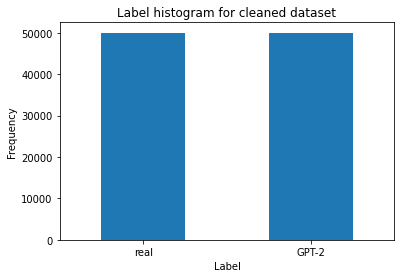

In [ ]:
# Summary of label frequency
print("Summary of label frequency:")
print(df_clean_1['label'].value_counts())
print()

# Plot the frequency of LABEL 
pd.value_counts(df_clean_1['label']).plot.bar(rot=0) # rot=0 for rotate the values of x-axis
#or df.plot.bar(rot=0) # or df.T.plot.bar(rot=0)
plt.title('Label histogram for cleaned dataset')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Write to CSV File

In [ ]:
#from google.colab import  drive
#drive.mount('/drive')

Mounted at /drive


In [ ]:
df_clean_1 = df_clean_1.drop('Unnamed: 0.1', 1)
df_clean_1

,id,ended,length,text,type,label,tidy_text
0,47018,True,102,The overarching quality of the Bloomberg era w...,train,real,overarching quality Bloomberg era change marry...
1,94338,True,142,This is about as bad as my morning commute get...,train,real,bad morning commute get winter long minute wai...
2,44507,True,631,More on Saskatchewan Liquor Privatization\n\nM...,train,real,Saskatchewan Liquor Privatization late planet ...
3,163493,False,1024,Killen was here\n\nPatrick Killen helped defin...,train,real,Killen Patrick Killen help define modern archi...
4,91925,True,51,Mailbox Rental & Mail Forwarding\n\nServices i...,train,real,Mailbox Rental Mail Forwarding Services Delawa...
...,...,...,...,...,...,...,...
99978,88658,True,548,The official website for Donten ni Warau TV 's...,train,GPT-2,official website Donten ni Warau TV Maken ki t...
99979,7575,True,803,"I have a long, slow, and somewhat unproductive...",train,GPT-2,long slow somewhat unproductive relationship G...
99980,38428,False,1024,"""Flexibility Is Not an Option""\n\nAt The Nouri...",train,GPT-2,flexibility option Nourish School use plant ba...
99981,129005,True,137,\nDuck Dynasty's Phil Robertson will have to m...,train,GPT-2,Duck Dynasty Phil Robertson make due reality t...


In [ ]:

file_name = 'webtext_gpt2_cleaned.csv'
df_clean_write = df_clean_1.copy()
df_clean_write.to_csv(file_name)

## Word Count

## Read clean data from file saved in google drive

In [ ]:
link = 'https://drive.google.com/file/d/1XvqYk-ZjdSm-slfAcsYMsBFhgN1c-ZWC/view?usp=sharing' # The shareable link
  
# to get the id part of the file 
id = link.split("/")[-2]

myfile = drive.CreateFile({'id':id})
myfile.GetContentFile('webtext_gpt2_cleaned.csv')

In [ ]:
# read the saved csv file above

df_clean_1 = pd.read_csv('webtext_gpt2_cleaned.csv', index_col=0)
df_clean_1

,id,ended,length,text,type,label,tidy_text
0,47018,True,102,The overarching quality of the Bloomberg era w...,train,real,overarching quality Bloomberg era change marry...
1,94338,True,142,This is about as bad as my morning commute get...,train,real,bad morning commute get winter long minute wai...
2,44507,True,631,More on Saskatchewan Liquor Privatization\n\nM...,train,real,Saskatchewan Liquor Privatization late planet ...
3,163493,False,1024,Killen was here\n\nPatrick Killen helped defin...,train,real,Killen Patrick Killen help define modern archi...
4,91925,True,51,Mailbox Rental & Mail Forwarding\n\nServices i...,train,real,Mailbox Rental Mail Forwarding Services Delawa...
...,...,...,...,...,...,...,...
99978,88658,True,548,The official website for Donten ni Warau TV 's...,train,GPT-2,official website Donten ni Warau TV Maken ki t...
99979,7575,True,803,"I have a long, slow, and somewhat unproductive...",train,GPT-2,long slow somewhat unproductive relationship G...
99980,38428,False,1024,"""Flexibility Is Not an Option""\n\nAt The Nouri...",train,GPT-2,flexibility option Nourish School use plant ba...
99981,129005,True,137,\nDuck Dynasty's Phil Robertson will have to m...,train,GPT-2,Duck Dynasty Phil Robertson make due reality t...


### Tokenization

In [ ]:
df_clean_2 = df_clean_1.copy()
df_clean_2

,id,ended,length,text,type,label,tidy_text
0,47018,True,102,The overarching quality of the Bloomberg era w...,train,real,overarching quality Bloomberg era change marry...
1,94338,True,142,This is about as bad as my morning commute get...,train,real,bad morning commute get winter long minute wai...
2,44507,True,631,More on Saskatchewan Liquor Privatization\n\nM...,train,real,Saskatchewan Liquor Privatization late planet ...
3,163493,False,1024,Killen was here\n\nPatrick Killen helped defin...,train,real,Killen Patrick Killen help define modern archi...
4,91925,True,51,Mailbox Rental & Mail Forwarding\n\nServices i...,train,real,Mailbox Rental Mail Forwarding Services Delawa...
...,...,...,...,...,...,...,...
99978,88658,True,548,The official website for Donten ni Warau TV 's...,train,GPT-2,official website Donten ni Warau TV Maken ki t...
99979,7575,True,803,"I have a long, slow, and somewhat unproductive...",train,GPT-2,long slow somewhat unproductive relationship G...
99980,38428,False,1024,"""Flexibility Is Not an Option""\n\nAt The Nouri...",train,GPT-2,flexibility option Nourish School use plant ba...
99981,129005,True,137,\nDuck Dynasty's Phil Robertson will have to m...,train,GPT-2,Duck Dynasty Phil Robertson make due reality t...


In [ ]:
text = df_clean_2['tidy_text'].copy()
df_clean_2['token_text'] = text.apply(lambda x: x.split())
df_clean_2

,id,ended,length,text,type,label,tidy_text,token_text
0,47018,True,102,The overarching quality of the Bloomberg era w...,train,real,overarching quality Bloomberg era change marry...,"[overarching, quality, Bloomberg, era, change,..."
1,94338,True,142,This is about as bad as my morning commute get...,train,real,bad morning commute get winter long minute wai...,"[bad, morning, commute, get, winter, long, min..."
2,44507,True,631,More on Saskatchewan Liquor Privatization\n\nM...,train,real,Saskatchewan Liquor Privatization late planet ...,"[Saskatchewan, Liquor, Privatization, late, pl..."
3,163493,False,1024,Killen was here\n\nPatrick Killen helped defin...,train,real,Killen Patrick Killen help define modern archi...,"[Killen, Patrick, Killen, help, define, modern..."
4,91925,True,51,Mailbox Rental & Mail Forwarding\n\nServices i...,train,real,Mailbox Rental Mail Forwarding Services Delawa...,"[Mailbox, Rental, Mail, Forwarding, Services, ..."
...,...,...,...,...,...,...,...,...
99978,88658,True,548,The official website for Donten ni Warau TV 's...,train,GPT-2,official website Donten ni Warau TV Maken ki t...,"[official, website, Donten, ni, Warau, TV, Mak..."
99979,7575,True,803,"I have a long, slow, and somewhat unproductive...",train,GPT-2,long slow somewhat unproductive relationship G...,"[long, slow, somewhat, unproductive, relations..."
99980,38428,False,1024,"""Flexibility Is Not an Option""\n\nAt The Nouri...",train,GPT-2,flexibility option Nourish School use plant ba...,"[flexibility, option, Nourish, School, use, pl..."
99981,129005,True,137,\nDuck Dynasty's Phil Robertson will have to m...,train,GPT-2,Duck Dynasty Phil Robertson make due reality t...,"[Duck, Dynasty, Phil, Robertson, make, due, re..."


### Splitting Real and GPT-2

In [ ]:
#bag_real = df_clean_2['label']=="real"
bag_real = df_clean_2[df_clean_2['label']=="real"]

#bag_gpt2 = df_clean_2['label']=="GPT-2"
bag_gpt2 = df_clean_2[df_clean_2['label']=="GPT-2"]

### Real Text

In [ ]:
bag_real

,id,ended,length,text,type,label,tidy_text,token_text
0,47018,True,102,The overarching quality of the Bloomberg era w...,train,real,overarching quality Bloomberg era change marry...,"[overarching, quality, Bloomberg, era, change,..."
1,94338,True,142,This is about as bad as my morning commute get...,train,real,bad morning commute get winter long minute wai...,"[bad, morning, commute, get, winter, long, min..."
2,44507,True,631,More on Saskatchewan Liquor Privatization\n\nM...,train,real,Saskatchewan Liquor Privatization late planet ...,"[Saskatchewan, Liquor, Privatization, late, pl..."
3,163493,False,1024,Killen was here\n\nPatrick Killen helped defin...,train,real,Killen Patrick Killen help define modern archi...,"[Killen, Patrick, Killen, help, define, modern..."
4,91925,True,51,Mailbox Rental & Mail Forwarding\n\nServices i...,train,real,Mailbox Rental Mail Forwarding Services Delawa...,"[Mailbox, Rental, Mail, Forwarding, Services, ..."
...,...,...,...,...,...,...,...,...
49995,209661,False,1024,"Language English\n\n""Only the small secrets ne...",train,real,Language English small secret need protect big...,"[Language, English, small, secret, need, prote..."
49996,254841,False,1024,"Real-time strategy games are, in a way, games ...",valid,real,real time strategy game way game competitive e...,"[real, time, strategy, game, way, game, compet..."
49997,107963,False,1024,Noted tuner Shane Tecklenburg has his hands in...,train,real,note tuner Shane Tecklenburg hand sort interes...,"[note, tuner, Shane, Tecklenburg, hand, sort, ..."
49998,108519,True,671,Wayne Rooney is hoping to be back against Ever...,train,real,Wayne Rooney hope back Everton April Wayne Roo...,"[Wayne, Rooney, hope, back, Everton, April, Wa..."


In [ ]:
# REAL - Combine all string from text column in dataframe
real_text = bag_real['tidy_text'].copy().values
combine_real = ' '.join(real_text)

In [ ]:
combine_real[0:10000]

'overarching quality Bloomberg era change marry insistence measurable result broad vision score many success failure downside take valiant run eliminate chronic homelessness flame upside determine complete construction third tunnel carry water upstate thereby ensure city survival almost finish project hand successor city New Yorkers live longer start bad morning commute get winter long minute wait Light Rail high sky endure morning breeze degree weather hear start rain soon may make thing little bad however nothing compare use past year Michigan base life happily endure outside element California winter long minute day much nice daily Michigan winter grind freeze cold temperature mountain snow unpredictability car engine cold weather advertisement Saskatchewan Liquor Privatization late planet Prairie Dog column delve world politic little bit take another look consequence consumer liquor retail privatization discuss privatization give Saskatchewan government Brad Wall seem insistent go 

In [ ]:
#real_tokenize = word_tokenize(combine_real)

In [ ]:
real_tokenize = combine_real.split()
print(real_tokenize[0:20])

['overarching', 'quality', 'Bloomberg', 'era', 'change', 'marry', 'insistence', 'measurable', 'result', 'broad', 'vision', 'score', 'many', 'success', 'failure', 'downside', 'take', 'valiant', 'run', 'eliminate']


In [ ]:
#real_tokenize = [word for word in real_tokenize if not word.lower() in stopwords]

In [ ]:
print(real_tokenize[0:30])

['overarching', 'quality', 'Bloomberg', 'era', 'change', 'Marrying', 'insistence', 'measurable', 'results', 'broad', 'vision', 'scored', 'many', 'successes', 'failures', 'downside', 'took', 'valiant', 'run', 'eliminating', 'chronic', 'homelessness', 'flamed', 'upside', 'determined', 'complete', 'construction', 'third', 'tunnel', 'carry']


In [ ]:
wordcounts = {}
for word in real_tokenize:
  if word in wordcounts:
    wordcounts[word] += 1
  else:
    wordcounts[word] = 1

# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
#dict(sorted(x.items(), key=lambda item: item[1]))
sort_wordcounts = dict(sorted(wordcounts.items(), key=lambda x: x[1], reverse=True))
#print(sorted(wordcounts.items(), key=lambda x: x[1], reverse=True))
print(len(wordcounts))

277535


In [ ]:
#
real_key = []
real_value = []
i  = 0
for key,value in sort_wordcounts.items():
  if i == 10:
        break 
  print (key, " ", value)
  i +=1
  real_key.append(key)
  real_value.append(value)

say   92511
one   58671
make   51548
year   49847
use   46603
get   43994
time   42669
go   39914
also   39289
like   38799


In [ ]:
real_df = pd.DataFrame(
    {'key': real_key, 'value': real_value})
real_df

,key,value
0,say,92511
1,one,58671
2,make,51548
3,year,49847
4,use,46603
5,get,43994
6,time,42669
7,go,39914
8,also,39289
9,like,38799


### GPT2 Text

In [ ]:
bag_gpt2

,id,ended,length,text,type,label,tidy_text,token_text
50000,90487,True,187,"We don't know what the ""truth"" really is, sinc...",train,GPT-2,know truth really since really time process im...,"[know, truth, really, since, really, time, pro..."
50001,161071,True,441,An image of a woman and a child in her home wa...,train,GPT-2,image woman child home publish social medium t...,"[image, woman, child, home, publish, social, m..."
50002,81101,True,797,The U.S. Food and Drug Administration on Thurs...,train,GPT-2,Food Drug Administration Thursday reject world...,"[Food, Drug, Administration, Thursday, reject,..."
50003,133635,True,321,The world is still waiting for the next Ninten...,train,GPT-2,world still wait next Nintendo system Nintendo...,"[world, still, wait, next, Nintendo, system, N..."
50004,44145,True,18,You have successfully requested this file from...,train,GPT-2,successfully request file us support please co...,"[successfully, request, file, us, support, ple..."
...,...,...,...,...,...,...,...,...
99995,88658,True,548,The official website for Donten ni Warau TV 's...,train,GPT-2,official website Donten ni Warau TV Maken ki t...,"[official, website, Donten, ni, Warau, TV, Mak..."
99996,7575,True,803,"I have a long, slow, and somewhat unproductive...",train,GPT-2,long slow somewhat unproductive relationship G...,"[long, slow, somewhat, unproductive, relations..."
99997,38428,False,1024,"""Flexibility Is Not an Option""\n\nAt The Nouri...",train,GPT-2,flexibility option Nourish School use plant ba...,"[flexibility, option, Nourish, School, use, pl..."
99998,129005,True,137,\nDuck Dynasty's Phil Robertson will have to m...,train,GPT-2,Duck Dynasty Phil Robertson make due reality t...,"[Duck, Dynasty, Phil, Robertson, make, due, re..."


In [ ]:
# GPT-2 - Combine all string from text column in dataframe
gpt2_text = bag_gpt2['tidy_text'].copy().values
combine_gpt2 = ' '.join(gpt2_text)

In [ ]:
combine_gpt2[0:10000]

'know truth really since really time process implication country legal necessity police explain rationale action know good reason something answer question yes matter many time repeat well leave chance without try influence matter believe believe believe happen act carry matter whether stick mind mean truth always point suppose leave chance point interested learning right way certain folk react image woman child home publish social medium today apparently show mother Yassin Salhi one Paris attacker son Salhi shoot dead police Stade de France image question one dozen photograph recently post interior home north west Berlin controversy around location home news report suggest may outside refugee reception area Jutland accord german authority actually locate Alsterleben building close Sch neberg refugee centre interview Germany Spiegel Online resident house whose name give claim several thousand migrant live time attack happy finally expose since medium clear kind issue resident quote say

In [ ]:
gpt2_tokenize = combine_gpt2.split()

In [ ]:
print(gpt2_tokenize[0:30])

['know', 'truth', 'really', 'since', 'really', 'time', 'process', 'implication', 'country', 'legal', 'necessity', 'police', 'explain', 'rationale', 'action', 'know', 'good', 'reason', 'something', 'answer', 'question', 'yes', 'matter', 'many', 'time', 'repeat', 'well', 'leave', 'chance', 'without']


In [ ]:
wordcounts = {}
for word in gpt2_tokenize:
  if word in wordcounts:
    wordcounts[word] += 1
  else:
    wordcounts[word] = 1

# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
#dict(sorted(x.items(), key=lambda item: item[1]))
sort_wordcounts = dict(sorted(wordcounts.items(), key=lambda x: x[1], reverse=True))
#print(sorted(wordcounts.items(), key=lambda x: x[1], reverse=True))
print(len(wordcounts))

135053


In [ ]:
#
gpt2_key = []
gpt2_value = []
i  = 0
for key,value in sort_wordcounts.items():
  if i == 10:
        break 
  print (key, " ", value)
  i +=1
  gpt2_key.append(key)
  gpt2_value.append(value)

say   135489
make   80508
one   74148
get   68136
go   66408
use   64686
people   63756
also   63169
year   57455
time   54050


In [ ]:
gpt2_df = pd.DataFrame(
    {'key': gpt2_key, 'value': gpt2_value})
gpt2_df

,key,value
0,say,135489
1,make,80508
2,one,74148
3,get,68136
4,go,66408
5,use,64686
6,people,63756
7,also,63169
8,year,57455
9,time,54050


### Combine Real and GPT-2 Counts

In [ ]:
real_df['label'] = 'Real'

# real_df.loc[len(real_df.index)] = ['get', 0, 'Real']

real_df[:9]

,key,value,label
0,say,92511,Real
1,one,58671,Real
2,make,51548,Real
3,year,49847,Real
4,use,46603,Real
5,get,43994,Real
6,time,42669,Real
7,go,39914,Real
8,also,39289,Real


In [ ]:
gpt2_df['label'] = 'GPT-2'

# gpt2_df.loc[len(gpt2_df.index)] = ['year', 0, 'GPT-2']

gpt2_df[:9]

,key,value,label
0,say,135489,GPT-2
1,make,80508,GPT-2
2,one,74148,GPT-2
3,get,68136,GPT-2
4,go,66408,GPT-2
5,use,64686,GPT-2
6,people,63756,GPT-2
7,also,63169,GPT-2
8,year,57455,GPT-2


In [ ]:
frames = [real_df[:9], gpt2_df[:9]]
combined_df = pd.concat(frames)
combined_df

,key,value,label
0,say,92511,Real
1,one,58671,Real
2,make,51548,Real
3,year,49847,Real
4,use,46603,Real
5,get,43994,Real
6,time,42669,Real
7,go,39914,Real
8,also,39289,Real
0,say,135489,GPT-2


In [ ]:
labels = pd.concat([real_df['key'][:9], gpt2_df['key'][:9]])
labels = labels.unique()
labels

array(['say', 'one', 'make', 'year', 'use', 'get', 'time', 'go', 'also',
       'people'], dtype=object)

In [ ]:
real_value[:9]

[92511, 58671, 51548, 49847, 46603, 43994, 42669, 39914, 39289]

In [ ]:
gpt2_value[:9]

[135489, 80508, 74148, 68136, 66408, 64686, 63756, 63169, 57455]

ValueError: ignored

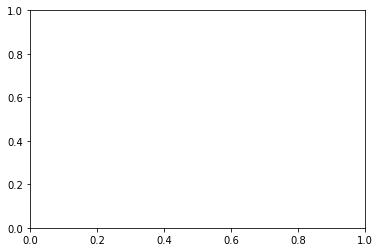

In [ ]:
#Variable
#real_df
#gpt2_df

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, real_value[:9], width, label='Real')
rects2 = ax.bar(x + width/2, gpt2_value[:9], width, label='GPT-2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Counts per Word')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

## WordCloud

### Word cloud for whole tidy text

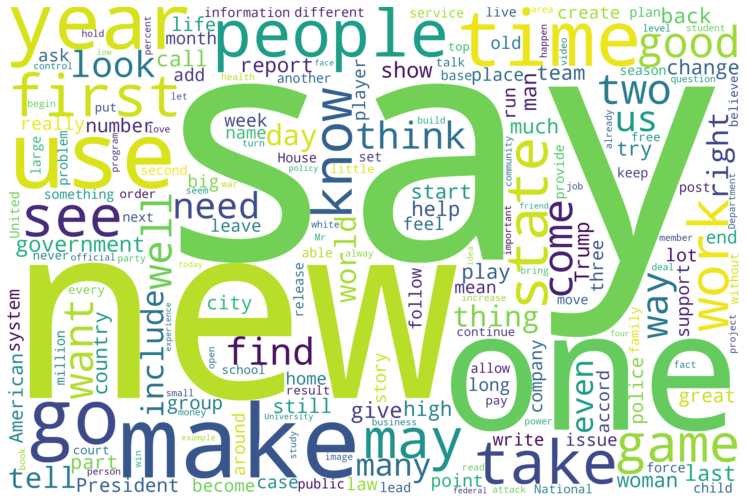

In [ ]:
# Plot the whole tidy text  
# Ref: https://medium.com/analytics-vidhya/twitter-sentiment-analysis-b9a12dbb2043
# Ref: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

from wordcloud import WordCloud
def plot_wordCloud(words):
  wordcloud = WordCloud(width=3000, height=2000, background_color="white", random_state=1,
                        collocations=False).generate(words)
              # collocations=False => the word cloud doesn’t appear as if it contains any duplicate words
                                   
  plt.figure(figsize=(15, 9))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")

t_text = df_clean_2['tidy_text']

normal_words = ' '.join([text for text in t_text])
plot_wordCloud(normal_words)

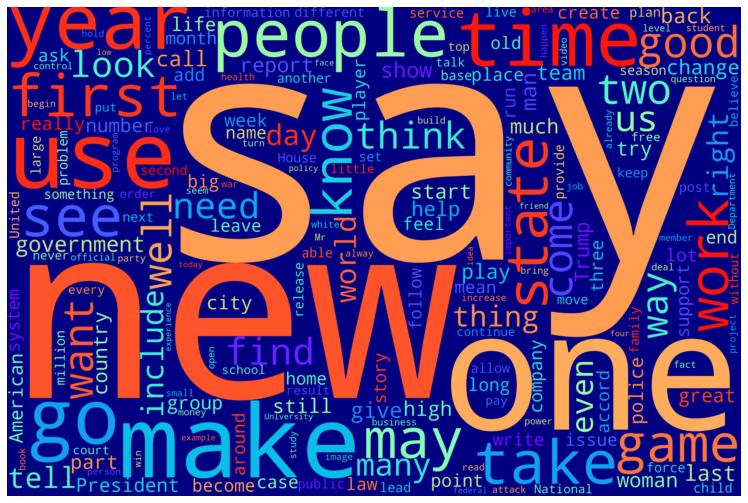

In [ ]:
# Plot the whole tidy text  
# Ref: https://medium.com/analytics-vidhya/twitter-sentiment-analysis-b9a12dbb2043
# Ref: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

from wordcloud import WordCloud
def plot_wordCloud(words):
  wordcloud = WordCloud(width=3000, height=2000, background_color='navy', colormap='rainbow', 
                        random_state=1, collocations=False).generate(words)                     
  plt.figure(figsize=(15,9))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")

t_text = df_clean_2['tidy_text']

normal_words = ' '.join([text for text in t_text])
plot_wordCloud(normal_words)

### Word cloud for real text

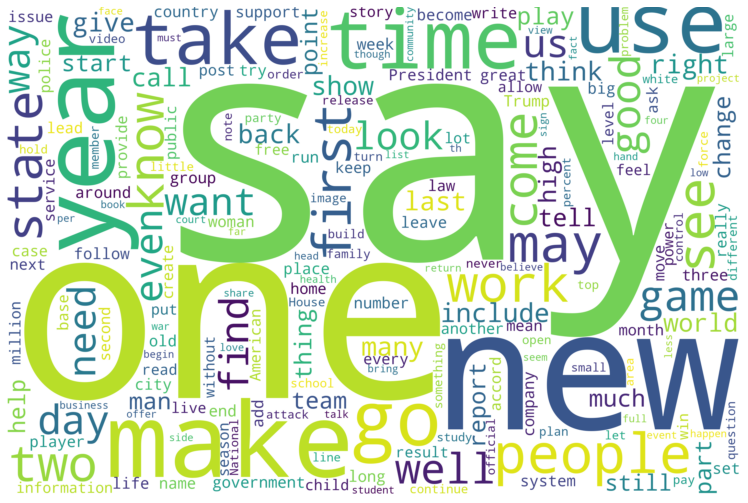

In [ ]:
# Plot the real text  
# Ref: https://medium.com/analytics-vidhya/twitter-sentiment-analysis-b9a12dbb2043
# Ref: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

from wordcloud import WordCloud
def plot_wordCloud(words):
  wordcloud = WordCloud(width=3000, height=2000, background_color="white", random_state=1,
                        collocations=False).generate(words)
              # collocations=False => the word cloud doesn’t appear as if it contains any duplicate words
                                   
  plt.figure(figsize=(15, 9))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")

real_text = df_clean_2['tidy_text'][df_clean_2['label']=='real']

normal_words = ' '.join([text for text in real_text])
plot_wordCloud(normal_words)

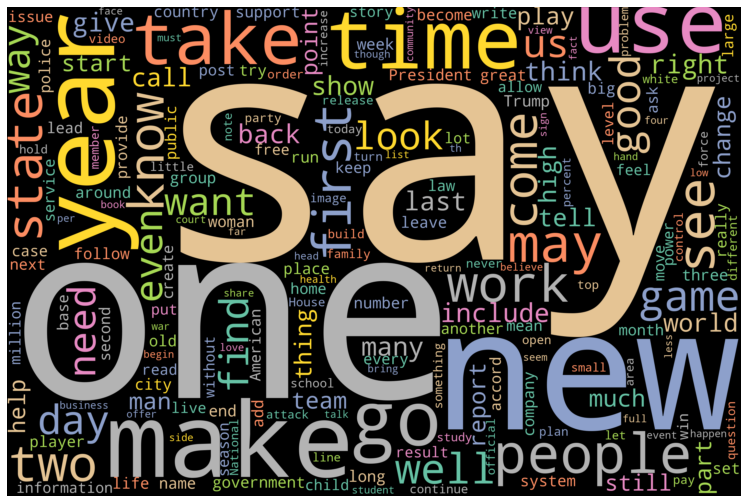

In [ ]:
# Plot the real text  
# Ref: https://medium.com/analytics-vidhya/twitter-sentiment-analysis-b9a12dbb2043
# Ref: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5 
from wordcloud import WordCloud
def plot_wordCloud(words):
  wordcloud = WordCloud(width=3000, height=2000, background_color="black", random_state=1,
                        colormap='Set2', collocations=False).generate(words)
              # collocations=False => the word cloud doesn’t appear as if it contains any duplicate words

  plt.figure(figsize=(15,9))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")

real_text = df_clean_2['tidy_text'][df_clean_2['label']=='real']

normal_words = ' '.join([text for text in real_text])
plot_wordCloud(normal_words)

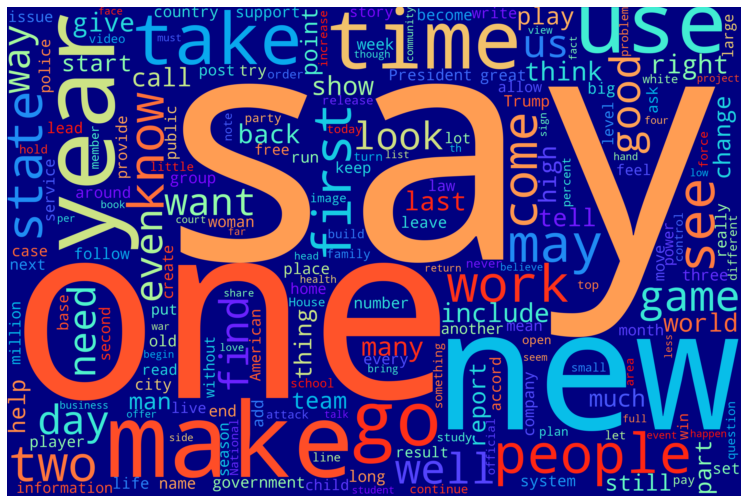

In [ ]:
# Plot the real text  
# Ref: https://medium.com/analytics-vidhya/twitter-sentiment-analysis-b9a12dbb2043
# Ref: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

from wordcloud import WordCloud
def plot_wordCloud(words):
  wordcloud = WordCloud(width=3000, height=2000, background_color='navy', colormap='rainbow', 
                        random_state=1, collocations=False).generate(words)                     
  plt.figure(figsize=(15,9))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")

real_text = df_clean_2['tidy_text'][df_clean_2['label']=='real']

normal_words = ' '.join([text for text in real_text])
plot_wordCloud(normal_words)

### Word cloud for GPT-2 text

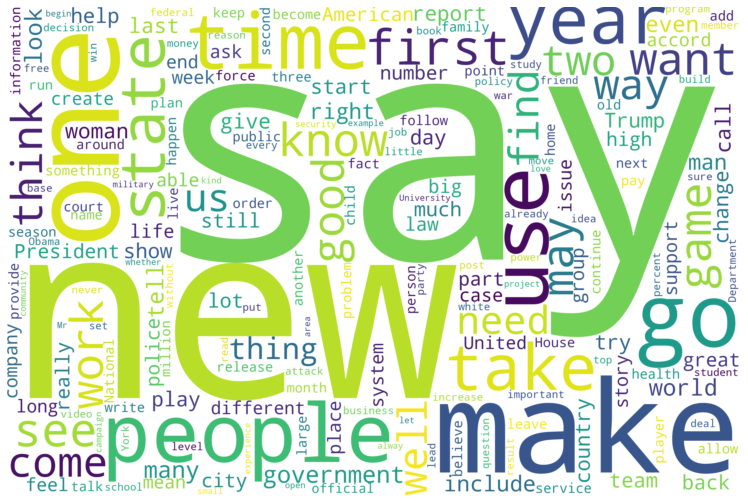

In [ ]:
# Plot the GPT-2 text  
# Ref: https://medium.com/analytics-vidhya/twitter-sentiment-analysis-b9a12dbb2043
# Ref: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

from wordcloud import WordCloud
def plot_wordCloud(words):
  wordcloud = WordCloud(width=3000, height=2000, background_color="white", random_state=1,
                        collocations=False).generate(words)
              # collocations=False => the word cloud doesn’t appear as if it contains any duplicate words
  #wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', 
                        #colormap='Pastel1', collocations=False, max_font_size = 110).generate(words)                      
  plt.figure(figsize=(15, 9))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")

real_text = df_clean_2['tidy_text'][df_clean_2['label']=='GPT-2']

normal_words = ' '.join([text for text in real_text])
plot_wordCloud(normal_words)

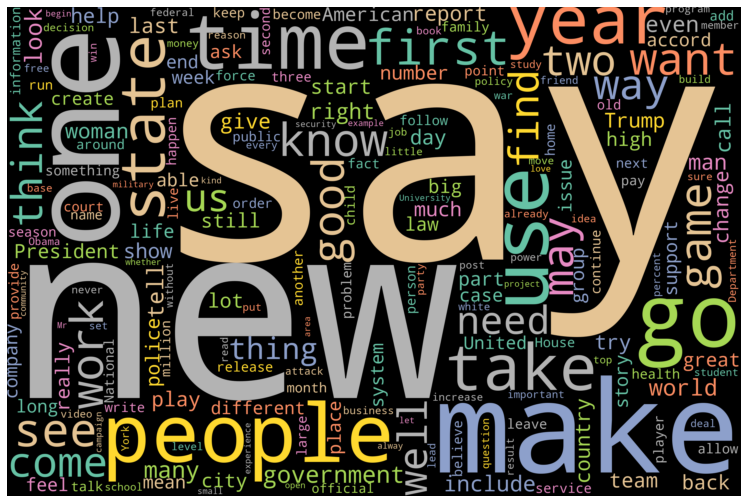

In [ ]:
# Plot the GPT-2 text  
# Ref: https://medium.com/analytics-vidhya/twitter-sentiment-analysis-b9a12dbb2043
# Ref: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5 
from wordcloud import WordCloud
def plot_wordCloud(words):
  wordcloud = WordCloud(width=3000, height=2000, background_color="black", random_state=1,
                        colormap='Set2', collocations=False).generate(words)
              # collocations=False => the word cloud doesn’t appear as if it contains any duplicate words
  #wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', 
                        #colormap='Pastel1', collocations=False, max_font_size = 110).generate(words)                      
  plt.figure(figsize=(15,9))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")

real_text = df_clean_2['tidy_text'][df_clean_2['label']=='GPT-2']

normal_words = ' '.join([text for text in real_text])
plot_wordCloud(normal_words)

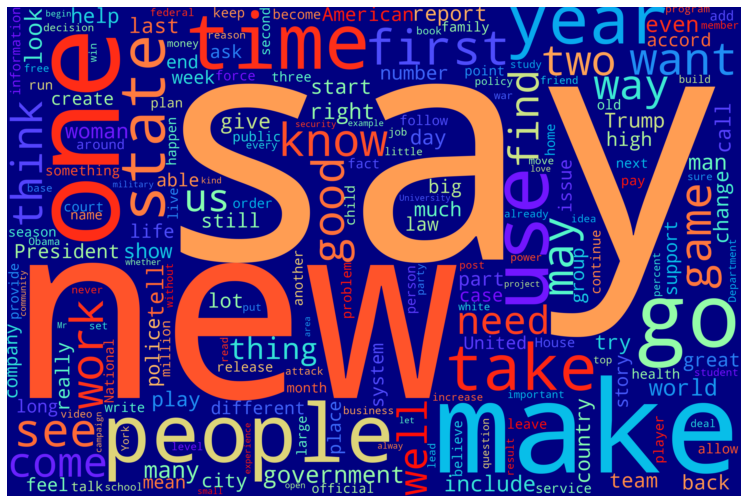

In [ ]:
# Plot the GPT-2 text  
# Ref: https://medium.com/analytics-vidhya/twitter-sentiment-analysis-b9a12dbb2043
# Ref: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

from wordcloud import WordCloud
def plot_wordCloud(words):
  wordcloud = WordCloud(width=3000, height=2000, background_color='navy', colormap='rainbow', 
                        random_state=1, collocations=False).generate(words)
                                              
  plt.figure(figsize=(15,9))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")

real_text = df_clean_2['tidy_text'][df_clean_2['label']=='GPT-2']

normal_words = ' '.join([text for text in real_text])
plot_wordCloud(normal_words)